In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

generate data

In [51]:
X=6*np.random.rand(200,1)-3
y=0.8 * X**2 + 0.9*X + 2 +np.random.randn(200,1)
#y=0.8x^2 + 0.9x +2

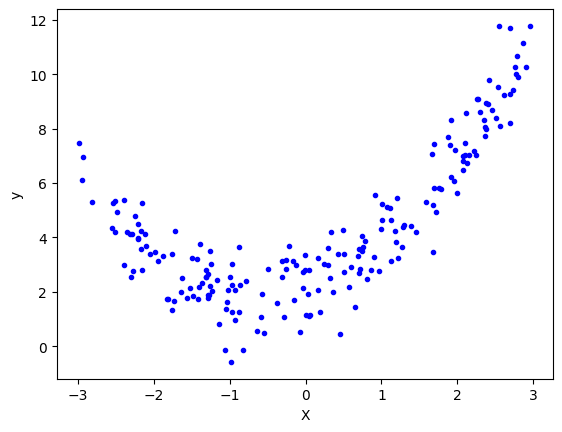

In [52]:
plt.plot(X,y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [53]:
#split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [54]:
#lets see what simple linear regression would do
model1=LinearRegression()

In [55]:
model1.fit(X_train,y_train)

LinearRegression()

In [56]:
y_pred=model1.predict(X_test)
r2_score(y_test,y_pred)

0.3531402563984286

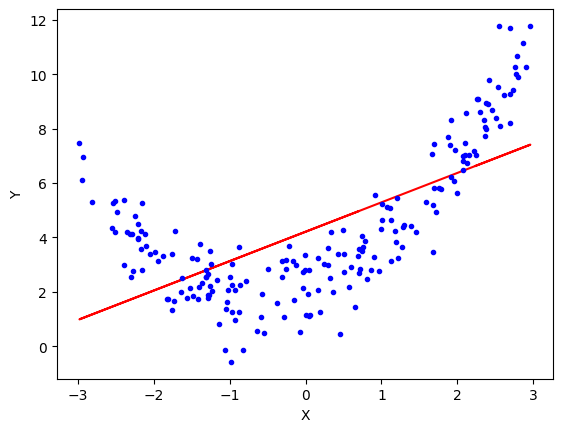

In [57]:
plt.plot(X_train,model1.predict(X_train),color='r')
plt.plot(X,y,"b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

this plot is not very good

#lets use polynomial features to enhance the fit


In [89]:
#deg=2(hyperparameter)
poly=PolynomialFeatures(degree=2,include_bias=True)#it can have include_bias=False(omits x^0 in fea)
#apply on both
X_train_trans=poly.fit_transform(X_train)
X_test_trans=poly.transform(X_test)

In [90]:
print(X_train[0])
print(X_train_trans[0])

[0.69547794]
[1.         0.69547794 0.48368956]


In [91]:
model2=LinearRegression()
model2.fit(X_train_trans,y_train)

LinearRegression()

In [92]:
y_pred=model2.predict(X_test_trans)

In [93]:
r2_score(y_test,y_pred)

0.8545839282915579

In [94]:
print(model2.coef_)

[[0.         0.92784042 0.75448019]]


In [95]:
print(model2.intercept_)

[2.13203427]


plotting model 2

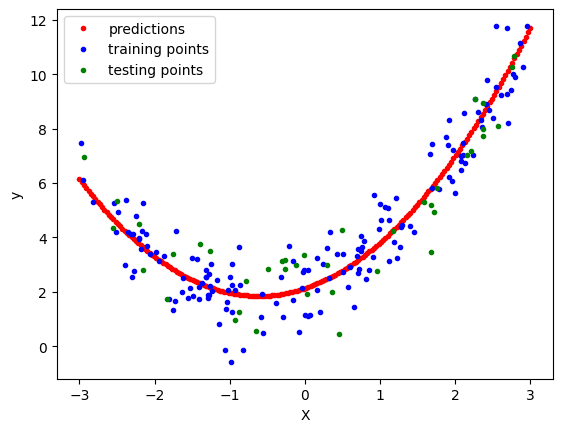

In [96]:
X_new=np.linspace(-3,3,200).reshape(200,1)
X_new_poly=poly.transform(X_new)
y_new=model2.predict(X_new_poly)

plt.plot(X_new,y_new,"r.",linewidth=2,label="predictions")
plt.plot(X_train,y_train,"b.",label='training points')
plt.plot(X_test,y_test,"g.",label="testing points")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

#multiple poly regression(more than 1 i/p colomns)

In [98]:
x=7*np.random.rand(100,1)-2.8
y=7*np.random.rand(100,1)-2.8

z=x**2+y**2+0.2*x+0.2*y+0.1*x*y+2+np.random.randn(100,1)

In [100]:
import plotly.express as px
df=px.data.iris()
fig=px.scatter_3d(df,x=x.ravel(),y=y.ravel(),z=z.ravel())
fig.show()